# Példa 1.10
Határozzuk meg az alábbi tartó AC és CB részein a keresztmetszet méreteit úgy, hogy a $b_{2}/a_{2}=b_{1}/a_{1}=2$ feltétel mellett hajlításra megfeleljen a tartó! Adatok: 

$L_{1}=2 \rm{m}$, 

$L_{2}=1\rm{m}$,

$L_{3}=4\rm{m}$,

$F=14\rm{kN}$,

$\sigma_{\mathrm{meg}}=100\rm{MPa}$.

<img src="Fig_1.10.png" style="width: 400px;">

# Megoldás

A megoldás során szimbolikus számításokat fogunk végezni, ehhez importáljuk a `sympy` modult.

In [1]:
import sympy as sp #betöltjük a sympy modult

Definiáljuk a szükséges szimbólumokat.
A feladatkiírás alapján $b_{1}$-t és $b_{2}$-t az $a_1$-ből és $a_2$-ből állítjuk elő, ezért ahhoz nem definiálunk külön szimbólumot.

In [2]:
a1,a2,L1,L2,L3,F,σ_meg = sp.symbols("a1,a2,L1,L2,L3,F,σ_meg")
b1 = 2*a1
b2 = 2*a2

A következő lépésben megadjuk a rendelkezésre álló adatokat.

In [3]:
L1_adat = 2 #m
L2_adat = 1 #m
L3_adat = 4 #m
F_adat = 14 #kN
σ_meg_adat = 100 #MPa

Ahhoz, hogy a behelyettesítést ne kelljen egyesével megtenni, csinálunk egy behelyettesítési listát, így amikor behelyettesítésre kerül sor, futtatáskor a program tudni fogja, hogy az adott szimbólum helyére milyen numerikus értéket kívánunk behelyettesíteni. Ennek formája:
```python
behelyettesítési lista = [(szimbólum, adat), (szimbólum, adat),...,(szimbólum, adat)]
```

In [4]:
adatok = [(L1,L1_adat),(L2,L2_adat),(L3,L3_adat),(F,F_adat),(σ_meg,σ_meg_adat)]

## Igénybevételi függvények
### Reakcióerők
Az igénybevételi függvények meghatározásához szükségünk van a reakcíóerőkre.  
Az egyensúlyi egyenletek: erőegyensúly a $z$ irányban és nyomatéki egyensúly az $\rm A$ pontra:  
$$ \sum F_z = 0: \quad F_A + F_B - F = 0$$  
$$ \sum M_y^{\rm A} = 0: \quad F_B(L_1+L_2+L_3) - F L_1 = 0 $$

In [5]:
FB = L1/(L1+L2+L3)*F #nyomatéki egyensúlyból; FB-re szimbolikus kifejezés
FB #FB pozitív z irányba mutat, azaz felfelé

F*L1/(L1 + L2 + L3)

In [6]:
FA = (F-FB).simplify() #erőegyensúlyból; FA-ra szimbolikus kifejezés (egyszerűsítve a .simplify() függvénnyel)
FA #FA pozitív z irányba mutat, azaz felfelé

F*(L2 + L3)/(L1 + L2 + L3)

$F_A$, $F_B$ numerikusan:

In [7]:
#numerikus adatok behelyettesítése, eredmény kN-ban
FAn = FA.subs(adatok)
FBn = FB.subs(adatok)

In [8]:
FAn #kN

10

In [9]:
FBn #kN

4

### Igénybevételi függvények
Az igénybevételi függvények felírhatók ez alapján. Ehhez szükségünk lesz az $x$ koordinátára, mint szimbólumra.

In [10]:
x = sp.symbols("x")

Az igénybevételi függvények szakaszonként adhatóak meg. Ehhez a `Piecewise()` függvényt használhatjuk. Fontos, hogy a megfelelő sorrendben adjuk meg a szakaszokat, növekvő $x$ szerint. A nyíró igénybevétel ($V(x)$):

In [11]:
V = sp.Piecewise((FA,x<=L1),(FA-F,x<=L1+L2+L3))
# Azaz: V(x) értéke konstans FA, ha x ≤ L1, illetve V(x) értéke konstans FA-F, ha  L1 < x ≤ L1+L2+L3 (teljes hossz).
# Az L1 < x ≤ teljes hossz esetén az L1 < x részt nem kell megadni, azt a program kezeli automatikusan.
V

Piecewise((F*(L2 + L3)/(L1 + L2 + L3), L1 >= x), (F*(L2 + L3)/(L1 + L2 + L3) - F, x <= L1 + L2 + L3))

Nyíró igénybevétel numerikusan:

In [12]:
Vn = V.subs(adatok) #numerikus értékek behelyettesítve
Vn #kN

Piecewise((10, x <= 2), (-4, x <= 7))

Hasonlóan írhatjuk fel az $M_{\rm h}(x)$ hajlító igénybevételi függvényt is:

In [13]:
Mh = sp.Piecewise((-FA*x,x<=L1),(-FA*x+F*(x-L1),x<=L1+L2+L3))
# Azaz: Mh(x) értéke -FA*x, ha x ≤ L1, illetve Mh(x) értéke -FA*x+F*(x-L1), ha  L1 < x ≤ teljes hossz.
Mh

Piecewise((-F*x*(L2 + L3)/(L1 + L2 + L3), L1 >= x), (-F*x*(L2 + L3)/(L1 + L2 + L3) + F*(-L1 + x), x <= L1 + L2 + L3))

In [14]:
Mhn = Mh.subs(adatok) #numerikus értékek behelyettesítve
Mhn #kNm

Piecewise((-10*x, x <= 2), (4*x - 28, x <= 7))

Ha ellenőrizni szeretnénk, hogy a hajlító nyomatéki függvényt jól írtuk-e fel, akkor felhasználhatjuk a $\frac{d}{d x}M_h(x)= -V(x)$ összefüggést:

In [15]:
V_ellenorzes = -Mh.diff(x) #.diff(x): egyszer deriválunk x szerint
V_ellenorzes

-Piecewise((-F*(L2 + L3)/(L1 + L2 + L3), L1 >= x), (-F*(L2 + L3)/(L1 + L2 + L3) + F, x <= L1 + L2 + L3))

Az eredmény helyes, de a `simplify()` utasítással szebbé tehetjük:

In [16]:
V_ellenorzes = V_ellenorzes.simplify() #felülírjuk az eredeti függvényt az egyszerűsített verzióval
display(V_ellenorzes) #kiíratjuk az egyszerűsített szimbolikus eredményt
V_ellenorzes.subs(adatok).simplify() #numerikusan

Piecewise((F*(L2 + L3)/(L1 + L2 + L3), L1 >= x), (-F*L1/(L1 + L2 + L3), L1 >= -L2 - L3 + x))

Piecewise((10, x <= 2), (-4, x <= 7))

Ez ránézésre valóban azonos a korábban megadott V-vel. Ezt úgy is ellenőrizhetjük, hogy kivonjuk egymásból a kettőt, és 0 eredményt kapunk:

In [17]:
(V - V_ellenorzes).simplify()

0

## Ábrázolás
Ehhez szükségünk lesz matplotlib modulra és egy olyan függvényre, amivel könnyen hozhatunk létre egyenlő távolságra lévő értékeket.

In [18]:
import matplotlib.pyplot as plt # Betöltjük a matplotlib modult, amivel plotolhatunk.
from numpy import linspace # Betöltjük csak linspace függvényt a numpy modulból (tehát nem a modul 
                           # összes függvényét), amivel majd a plotoláshoz készítjük az x értékek sorozatát

Létrehozzuk az x, V és Mh adatsort a plotoláshoz:  
- `xs`: `N_osztas` darab x érték `0` és `L` között:
```python
xs = linspace(0,L,N_osztas)
```
- `Vxs` és `Mhxs`: `N_osztas` darab nyíróerő és hajlítónyomatéki érték az `xs`-ben megadott helyeken 
[list comprehension](https://www.datacamp.com/community/tutorials/python-list-comprehension?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-486527602543&utm_loc_interest_ms=&utm_loc_physical_ms=9063082&gclid=EAIaIQobChMIrZvm-9Hi5wIVR7TtCh0n4w3nEAAYASAAEgJNk_D_BwE) segítségével 
(tehát gyakorlatilag a létrehozott osztáshelyeken kiértékeljük az adott függvényeket):
```python
Vxs = [V(x) for x in xs]
Mhxs = [Mh(x) for x in xs]
```
A *list comprehension* gyakorlatilag egy tömör `for` ciklus listák gyors létrehozására.


In [19]:
L = (L1 + L2 + L3).subs(adatok) # A rúd teljes hossza.
xs = linspace(0.,float(L),101)  # Felveszünk 101 darab x értéket a rúd hossza mentén 
                                # (az L hosszat át kell alakítani float-tá).
Vxs = [Vn.subs(x,xi) for xi in xs] # Kiszámoljuk a nyíróerő függvény értékeit a megadott x helyeken. 
# Vn.subs(x,xi): a Vn függvényben lévő x változó helyére behelyettesítjük xi-t.
Mhxs = [Mhn.subs(x,xi) for xi in xs] # Kiszámoljuk a hajlítónyomatéki függvény értékeit a megadott x helyeken.

Plotoljuk a függvényeket. Mivel V(x)-ben szakadás van x=2-nél, láthatjuk, hogy a vonal nem teljesen függőleges. Ez csak a kirajzolás "hibája".

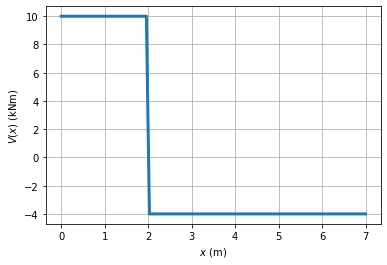

In [20]:
plt.plot(xs, Vxs, lw = 3) # A V(x) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw).
plt.xlabel("$x$ (m)") #x tengelyhez tartozó tengelyfelirat
plt.ylabel("$V(x)$ (kNm)") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács
plt.show() #kirajzolás

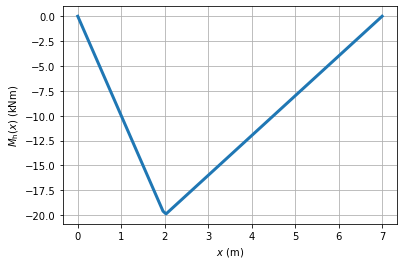

In [34]:
plt.plot(xs, Mhxs, lw = 3) #az Mh(x) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw)
plt.ylabel(r"$M_{\rm h}(x)$ (kNm)") # x tengelyhez tartozó tengelyfelirat. Az r kell az "" elé, ha '\' (backslash) 
                                    # karaktert szeretnénk a stringbe tenni a LaTeX parancsok miatt.

plt.xlabel("$x$ (m)") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács létrehozása
plt.show() #kirajzolás

A nyomaték igénybevételi ábrájáról leolvasható, hogy az AC szakaszon $x=2$-nél (vastag KM), míg a CB szakaszon (vékony KM) a keresztmetszetváltásnál, azaz $x=3$-nál a veszi fel hajlító igénybevétel az abszolút értékben maximális értékét.

## Méretezés

### AC szakasz
Maximális hajlító igénybevétel:
$$M_{\rm h,ACmax}=M_{\rm h}(x=2)$$
Keresztmetszeti tényező:
$$K_{\rm AC}=\frac{I_{\rm AC}}{\frac{b_1}{2}}=\frac{\frac{a_1 b_1^3}{12}}{\frac{b_1}{2}}$$
Megengedett feszülség:
$$\sigma_{\rm meg}=\frac{|M_{\rm h,ACmax}|}{K_{\rm AC}}$$
Mértékegységek egyeztetése: $M_{\rm h,ACmax}$ átváltása Nmm-re.

In [22]:
Mh_ACmax=Mhn.subs(x,2)*1e6 #mértékegység átváltás 1 kNm = 10^6 Nmm -> 1e6 = 10^6
Mh_ACmax #Nmm

-20000000.0000000

In [23]:
I_AC=a1*b1**3/12 #ism: ** a hatványozás jele
I_AC #b1 = 2*a1 automatikus behelyettesítésével (a szimbólumok definiálása miatt, lsd. a dokumentum eleje)

2*a1**4/3

In [24]:
K_AC=I_AC/(b1/2) #keresztmetszeti tényező értéke a1 függvényében
K_AC

2*a1**3/3

In [25]:
# Kiszámoljuk a minimálisan szükséges keresztmetszeti tényezőt:
K_AC_min=sp.Abs(Mh_ACmax)/σ_meg #sp.Abs(): abszolút érték
K_AC_min=K_AC_min.subs(adatok)
K_AC_min # mm^3

200000.000000000

A minimálisan szükséges $a_1$ méret:

In [26]:
# Kiszámoljuk a1-t a keresztmetszeti tényező értékének átrendezésével:
a1_min=sp.root(3/2*K_AC_min,3)  #sp.root(valami,n): valaminek az n. gyöke
a1_min.evalf(5) #mm  - 5 értékes jegyre

66.943

A minimálisan szükséges $b_1$ méret:

In [27]:
b1.subs(a1,a1_min).evalf(5) #mm

133.89

### CB szakasz
Maximális hajlító igénybevétel:
$$M_{\rm h,CBmax}=M_{\rm h}(3)$$
Keresztmetszeti tényező:
$$K_{\rm CB}=\frac{I_{\rm CB}}{\frac{b_2}{2}}=\frac{\frac{a_2 b_2^3}{12}}{\frac{b_2}{2}}$$
Megengedett feszülség:
$$\sigma_{\rm meg}=\frac{|M_{\rm h,CBmax}|}{K_{\rm CB}}$$
Mértékegységek egyeztetése: $M_{\rm h,CBmax}$ átváltása Nmm-re.

In [28]:
Mh_CBmax = Mhn.subs(x,3)*1e6 #mértékegység átváltás 1 kNm = 10^6 Nmm -> 1e6 = 10^6
Mh_CBmax #Nmm

-16000000.0000000

In [29]:
I_CB = a2*b2**3/12
I_CB #b2 = 2*a2 automatikus behelyettesítésével (a szimbólumok definiálása miatt)

2*a2**4/3

In [30]:
K_CB=I_CB/(b2/2) #kifejezzük a keresztmetszeti tényezőt a2-vel
K_CB

2*a2**3/3

In [31]:
#kiszámoljuk a minimális szükséges keresztmetszeti tényezőt
K_CB_min=sp.Abs(Mh_CBmax)/σ_meg #sp.Abs(): abszolút érték
K_CB_min=K_CB_min.subs(adatok)
K_CB_min # mm^3

160000.000000000

A minimálisan szükséges $a_2$ méret:

In [32]:
#kiszámoljuk a1-t a keresztmetszeti tényező értékének átrendezésével
a2_min=sp.root(3/2*K_CB_min,3)  #sp.root(valami,n): valaminek az n. gyöke
a2_min.evalf(5) #mm  - 5 értékes jegyre

62.145

A minimálisan szükséges $b_2$ méret:

In [33]:
b2.subs(a2,a2_min).evalf(5) #mm

124.29